### **Water Quality Prediction Using Machine Learning Classification**


**Context:**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


---

**Problem Statement:**

The first step to effective healthcare is preventing disease. Widespread access to clean water, sanitation, and hygiene are crucial to ensure this. Water quality varies depending on the place and condition of the source of water and the treatment it receives. There could be specific contaminants in water resulting in health issues, ranging from gastrointestinal illness, reproductive problems, and neurological disorders. Infants, children, pregnant women, the elderly, and those with compromised immune systems may be especially susceptible.





---
**Objective:**

*   To identify the different factors that affect the water potability.
*   To make a model to evaluate water potability using the Water Quality dataset.
---



**Dataset:**

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

The dataset contains water quality metrics for 3276 different water bodies.

---

**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, make_scorer

**Importing the CSV Data**

In [ ]:
orig_url="https://drive.google.com/file/d/1HdaYFPIjNJRqcWuZDrc1QyEdVvgrfLhX/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Printing the Info - DataTypes, Non-Null**

In [ ]:
#Pulling the information about the data - Data Type, Null Count etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Unique values**

In [ ]:
#Identifying the number of unique values available in each columns
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

**Observations**
- There are 3276 enteries and 10 columns
- There are several missing values for **ph, Sulfate, Trihalomethanes** in the data. So the data needs to be cleaned in order to use it

**Data Summary**

In [ ]:
#Pulling statistical Summary of the numerical columns
numerical_columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
summary=data[numerical_columns].describe().T
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.08,1.59,0.00,6.09,7.04,8.06,14.00
Hardness,3276.0,196.37,32.88,47.43,176.85,196.97,216.67,323.12
Solids,3276.0,22014.09,8768.57,320.94,15666.69,20927.83,27332.76,61227.20
Chloramines,3276.0,7.12,1.58,0.35,6.13,7.13,8.11,13.13
Sulfate,2495.0,333.78,41.42,129.00,307.70,333.07,359.95,481.03
Conductivity,3276.0,426.21,80.82,181.48,365.73,421.88,481.79,753.34
Organic_carbon,3276.0,14.28,3.31,2.20,12.07,14.22,16.56,28.30
Trihalomethanes,3114.0,66.40,16.18,0.74,55.84,66.62,77.34,124.00
Turbidity,3276.0,3.97,0.78,1.45,3.44,3.96,4.50,6.74


**Histogram**

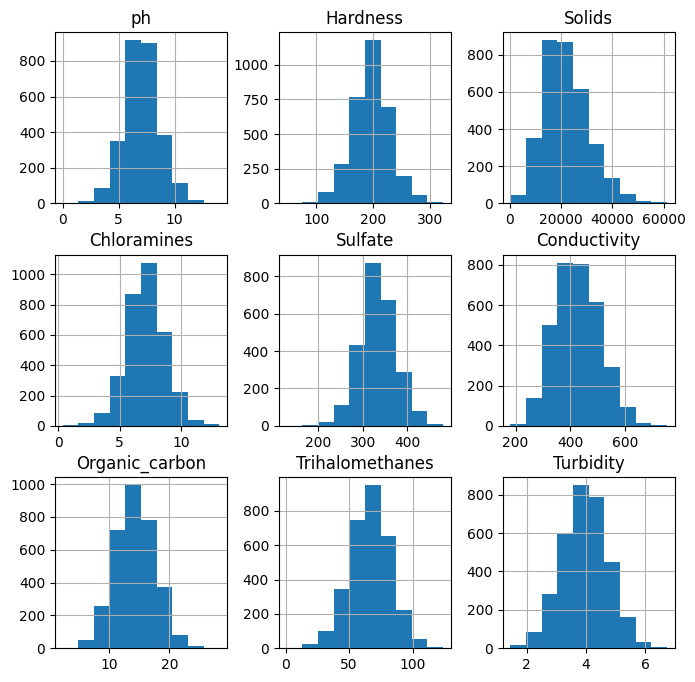

In [ ]:
#Plotting histograms for quantitaive (numerical) variables
data[numerical_columns].hist(figsize=(8,8))
plt.show()

**Missing Data Handling**

- Trihalomethanes has very less missing values ~< 5%, so we will delete the rows with missing values
- ph and Sulfate, we will impute the missing values with mean values

In [ ]:
#Dropping the rows with missing values for Trihalomethanes
data.dropna(subset=['Trihalomethanes'], how='any', inplace=True)

#Imputing the missing values with mean for ph, Sulfate
mean = data.mean()
data.fillna(mean, inplace=True)

#Pulling data info again to confirm if there are any null values
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3114 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3114 non-null   float64
 1   Hardness         3114 non-null   float64
 2   Solids           3114 non-null   float64
 3   Chloramines      3114 non-null   float64
 4   Sulfate          3114 non-null   float64
 5   Conductivity     3114 non-null   float64
 6   Organic_carbon   3114 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3114 non-null   float64
 9   Potability       3114 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 267.6 KB


**Correlation Matrix for predictor variables**

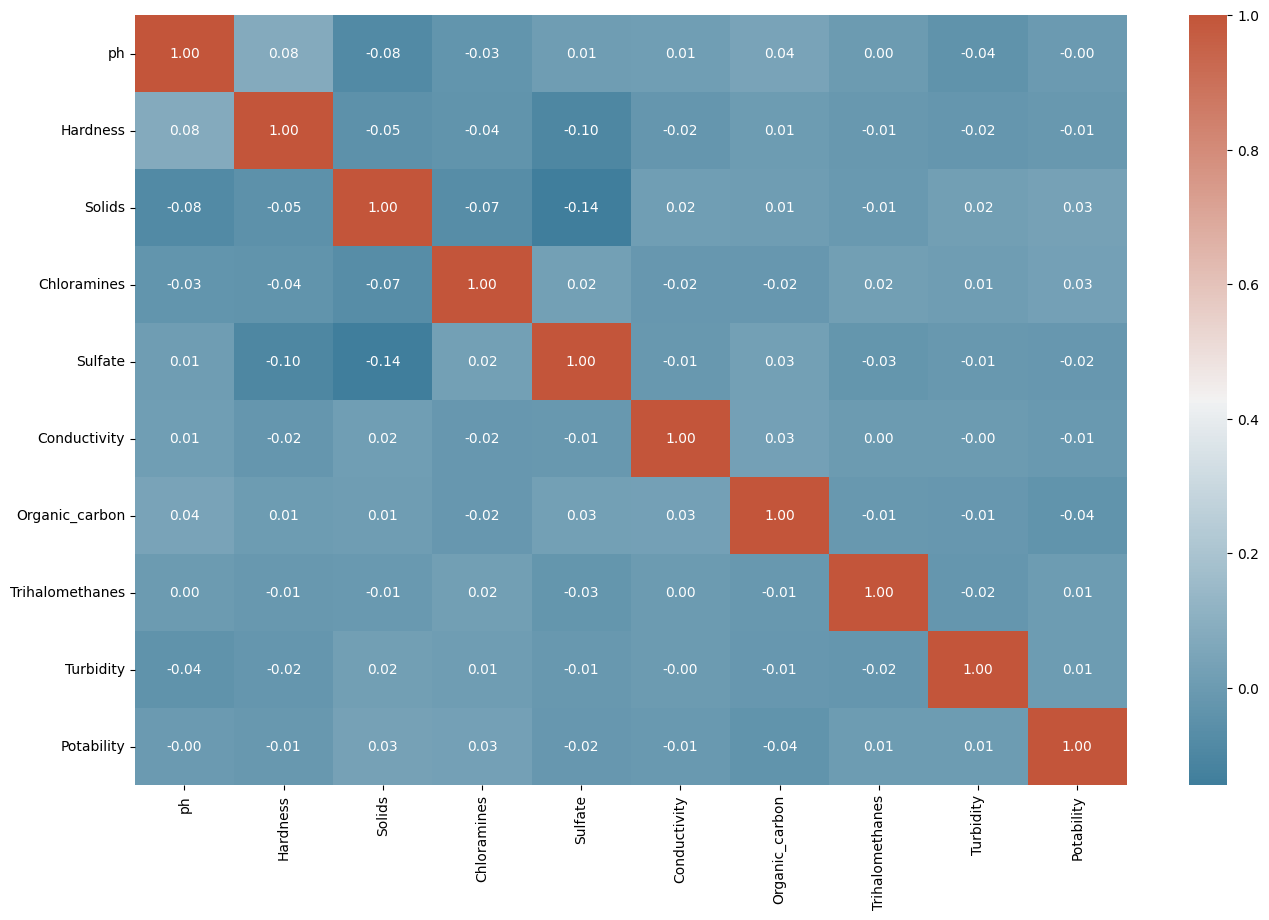

In [ ]:
# Checking the correlations
plt.figure(figsize=(16,10))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap=cmap)
plt.show()

**Observations:**

**Weak Correlations:**
Most of the correlations are weak, as indicated by values close to 0. For example, pH has very low correlations with other variables.
Turbidity shows weak correlations with other variables.

**Negative Correlations:**
The only notable negative correlation is between Solids and Sulfate that too week(approximately -0.14). This suggests that higher sulfate levels are associated with lower solids concentration.

**Interpretation:**
These correlations provide insights into how the predictor variables relate to each other. Since no variables have strong correlation(>0.7) we donot need to check for outliers.

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
#Creating Independent and Dependent variables
Y= data.Potability
x= data.drop(columns = ['Potability'])

**Scaling the data**

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(x)

# Create a new DataFrame with scaled data
scaled_x = pd.DataFrame(scaled_data, columns=x.columns)
scaled_x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.257900,-0.134481,0.111702,0.964686,1.700988,-1.176271,1.273445,-1.290536
1,-2.302304,-2.037266,-0.382094,-0.309156,0.000000,2.054036,0.271169,-0.622493,0.688131
2,0.697367,0.846257,-0.235505,1.362107,0.000000,-0.099078,0.780348,0.001472,-1.171112
3,0.846317,0.546301,0.006106,0.592150,0.642972,-0.782767,1.253122,2.098969,0.853004
4,1.377025,-0.465584,-0.456686,-0.365260,-0.650223,-0.348580,-0.820912,-2.126974,0.140442


**Splitting the data into 70% train and 30% test set**



In [ ]:
#Splitting data for train and test
x_train,x_test,Y_train,Y_test=train_test_split(scaled_x,Y,test_size=0.3,random_state=1,stratify=Y)

**Metrics**

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# **Model 1: Decision Tree Classifier**

In [ ]:
#building decision tree
dtc = DecisionTreeClassifier(random_state=1)

#fitting decision tree
dtc = dtc.fit(x_train,Y_train)

#predict the response for test
Y_pred = dtc.predict(x_test)

**Evaluating the Model on training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       1.00      1.00      1.00       856

    accuracy                           1.00      2179
   macro avg       1.00      1.00      1.00      2179
weighted avg       1.00      1.00      1.00      2179



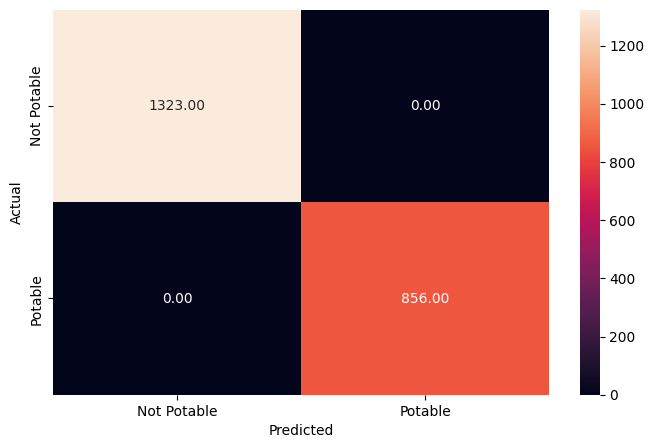

In [ ]:
#checking model performace of training data
Y_pred_train_port = dtc.predict(x_train)
metrics_score(Y_train, Y_pred_train_port)

**Evaluating the Model on testing data**

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       568
           1       0.47      0.46      0.46       367

    accuracy                           0.58       935
   macro avg       0.56      0.56      0.56       935
weighted avg       0.58      0.58      0.58       935



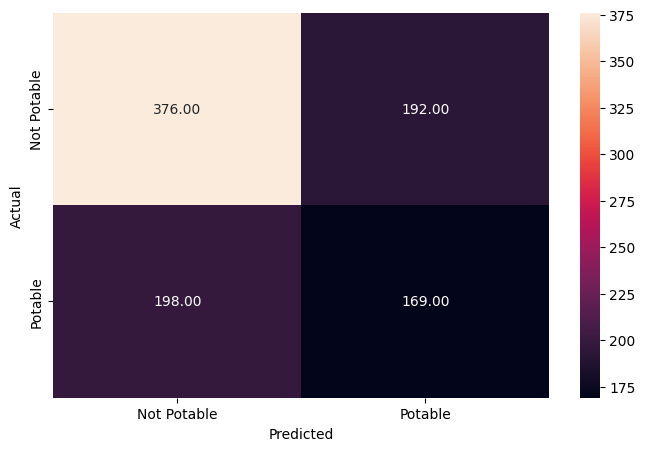

In [ ]:
Y_pred_test_port = dtc.predict(x_test)
metrics_score(Y_test, Y_pred_test_port)

**Observations**

- Achieving a classification rate of 58% indicates a decent level of accuracy.
- However, there is room for improvement by fine-tuning the parameters within the decision tree algorithm.

Upon reviewing the confusion matrix for the training data, it becomes evident that the model's accuracy is lower on the test dataset compared to the training dataset. This inconsistency implies potential overfitting, wherein the model performs well on the training data but struggles to generalize to new, unseen data. To mitigate this overfitting issue, we can employ techniques for hyperparameter tuning.








**Hyperparameter Tuning**

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Performance on Test Data:
              precision    recall  f1-score   support

           0       0.64      0.95      0.76       568
           1       0.66      0.16      0.26       367

    accuracy                           0.64       935
   macro avg       0.65      0.55      0.51       935
weighted avg       0.65      0.64      0.56       935



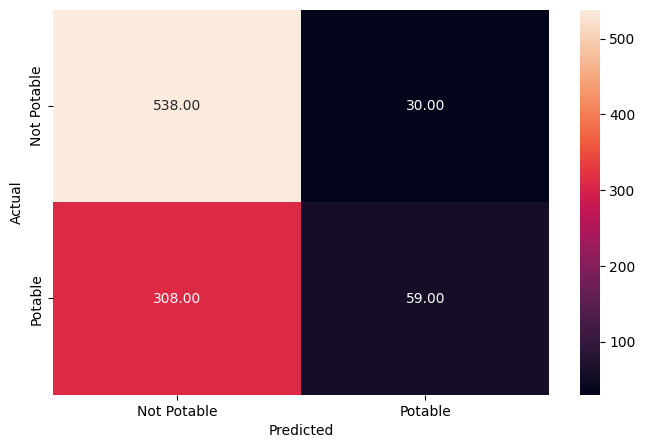

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting: Gini impurity or information gain (entropy)
    'splitter': ['best', 'random'],  # Strategy for choosing the split: best or random
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a decision tree classifier object
dt_classifier = DecisionTreeClassifier(class_weight={0: 0.95, 1: 0.05}, random_state=1)

# Create GridSearchCV object
gsearch = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
gsearch.fit(x_train, Y_train)

# Get the best parameters and best score
best_params = gsearch.best_params_
print("Best Parameters:", best_params)

# Train Decision Tree Classifer with the best hyperparameters
best_dt_model = gsearch.best_estimator_
best_dt_model.fit(x_train, Y_train)

# Checking performance on the test dataset
print("Performance on Test Data:")
Y_pred_test_best = best_dt_model.predict(x_test)
metrics_score(Y_test, Y_pred_test_best)

**Observations**


*   After hyperparameter tuning the model now demonstrates an overall accuracy of 64%,  which was initially 58%
*   The classifier achieved high recall (0.95) for non-potable instances but struggled with low recall (0.16) for potable instances, indicating a need for improved identification of the latter class.
*   Additionally, precision values of 0.64 for non-potable and 0.66 for potable suggest some false positives in both predictions, calling for refinements to enhance accuracy.






**Feature Importance**

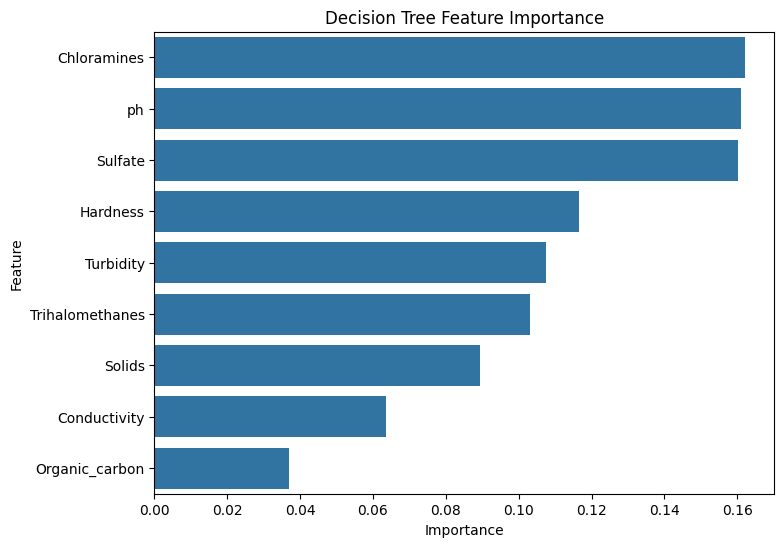

In [ ]:
# Get the feature importances from the decision tree model
importances = best_dt_model.feature_importances_

# Get the names of the features
columns = x_train.columns

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance'])

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

**Observations**

*   Chloramines, pH, Sulfate are the top determining factor in the model's decisions and Organic_carbon being the least.​
*   The feature importance suggests that model relies on multiple factors rather than a single dominant one



# **Model 2: Logistic Regression**

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57      1323
           1       0.41      0.51      0.46       856

    accuracy                           0.52      2179
   macro avg       0.52      0.52      0.51      2179
weighted avg       0.54      0.52      0.53      2179



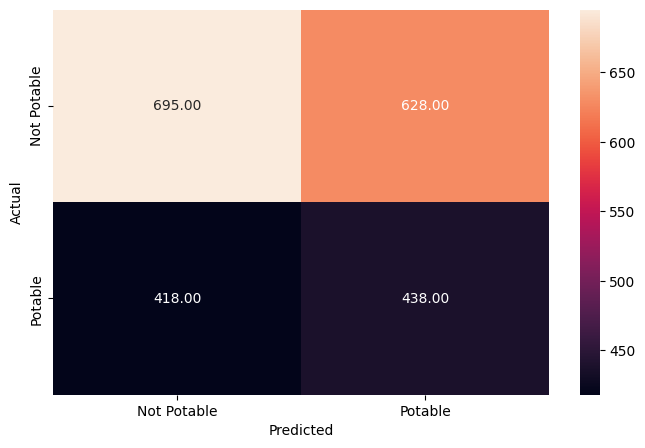

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.62      0.52      0.56       568
           1       0.40      0.51      0.45       367

    accuracy                           0.51       935
   macro avg       0.51      0.51      0.51       935
weighted avg       0.53      0.51      0.52       935



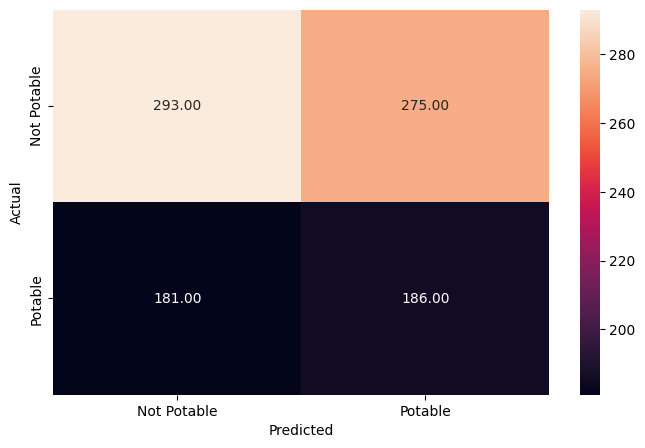

In [ ]:
# Define the cost matrix
C_FP = 1  # Cost of false positives
C_FN = 10  # Cost of false negatives

# Define custom cost-sensitive loss function
def cost_sensitive_loss(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cost = cm[0, 1] * C_FP + cm[1, 0] * C_FN  # Cost of false positives + Cost of false negatives
    return cost

# Create a logistic regression model object with cost-sensitive learning
lg_cost_sensitive = LogisticRegression(class_weight='balanced', solver='liblinear')
# 'class_weight' parameter is set to 'balanced' to automatically adjust class weights inversely proportional to class frequencies
# 'solver' parameter is set to 'liblinear' for small datasets

# Fitting the model
lg_cost_sensitive.fit(x_train, Y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
Y_pred_train_cost_sensitive = lg_cost_sensitive.predict(x_train)
metrics_score(Y_train, Y_pred_train_cost_sensitive)

# Checking the performance on the test dataset
print("Performance on Test Data:")
Y_pred_test_cost_sensitive = lg_cost_sensitive.predict(x_test)
metrics_score(Y_test, Y_pred_test_cost_sensitive)

**Observations**

*   The precision, recall, and f1-score are nearly identical for classes 0 and 1 between training and testing datasets, indicating the model's predictions are stable across both.
*   The model's consistent performance on both the training and test data implies that it is generalizing well, without signs of overfitting

**Feature Importance**

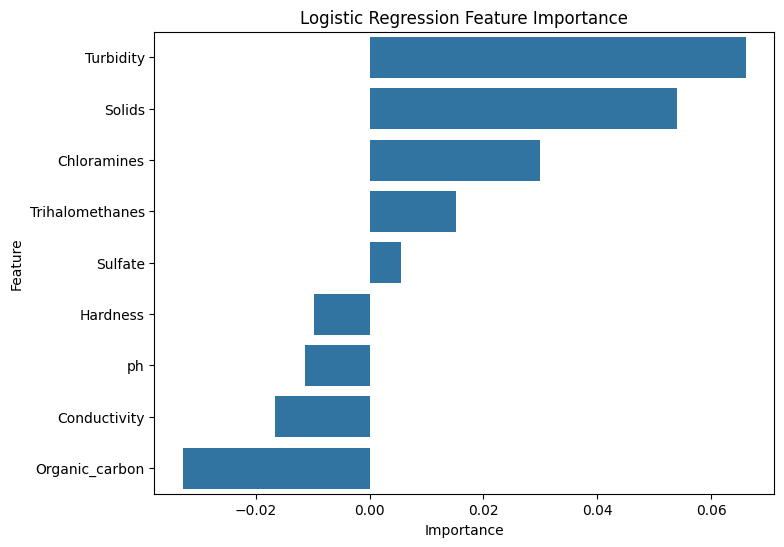

In [ ]:
# Get the coefficients (importances) from the logistic regression model
importances = lg_cost_sensitive.coef_[0]

# Get the names of the features
columns = x_train.columns

importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)

# Plot the feature importances
plt.figure(figsize=(8,6))
sns.barplot(x=importance_df.Importance,y=importance_df.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

**Observations**

*   The features have varying levels of importance, with some having positive importance and others appearing to have negative importance
*   Positive and negative values for feature importance signify the respective direct and inverse influences that the features have on the predicted outcome, as per the logistic regression analysis

**Precision Recall Curve**

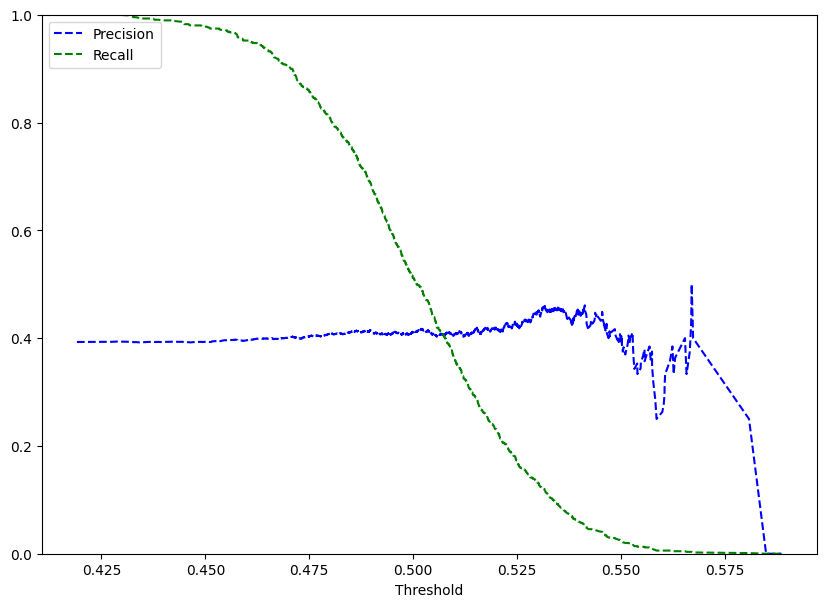

In [ ]:
# Printing the coefficients of logistic regression
cols=x.columns

coef_lg=lg_cost_sensitive.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

Y_scores_lg=lg_cost_sensitive.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_train, Y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='Precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation**

- This threshold value of 0.51 serves as the point of balance between precision and recall, indicating the trade-off between these two metrics.

- It's the point where the classifier achieves a reasonable balance between making correct positive predictions (precision) and capturing true positive instances (recall).

# **Model 3: K Nearest Neighbors**

Best Parameters: {'n_neighbors': 9}
Performance on Training Data:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      1323
           1       0.72      0.48      0.58       856

    accuracy                           0.72      2179
   macro avg       0.72      0.68      0.69      2179
weighted avg       0.72      0.72      0.71      2179



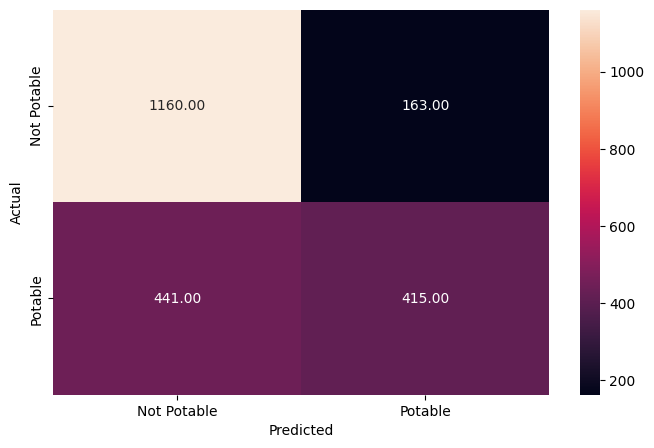

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       568
           1       0.57      0.33      0.42       367

    accuracy                           0.64       935
   macro avg       0.62      0.59      0.58       935
weighted avg       0.63      0.64      0.61       935



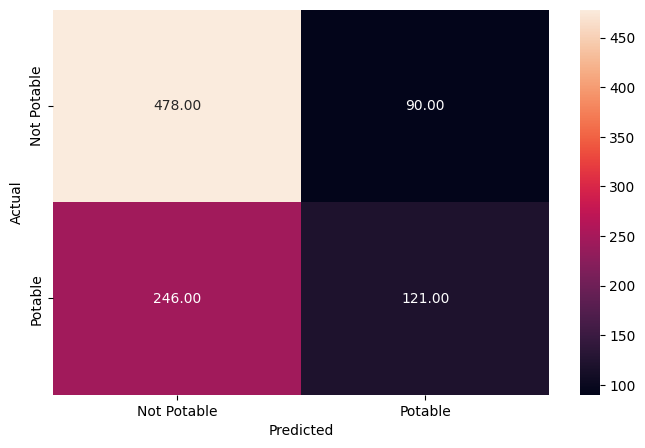

In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15]  # Specify the range of values for the number of neighbors (k)
}

knn_classifier = KNeighborsClassifier() # Instantiate a K-Nearest Neighbors classifier object

# Create a GridSearchCV object with 5-fold cross-validation and accuracy scoring
gridsearch = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
gridsearch.fit(x_train, Y_train)

# Get the best parameters selected by grid search
best_params = gridsearch.best_params_

print("Best Parameters:", best_params)

# Instantiate a K-Nearest Neighbors classifier with the best hyperparameters
best_dt_model = gridsearch.best_estimator_

# Train the K-Nearest Neighbors classifier with the best hyperparameters on the training data
best_dt_model.fit(x_train, Y_train)

# Evaluate the performance of the best model on the training dataset
print("Performance on Training Data:")
Y_pred_train = best_dt_model.predict(x_train)
metrics_score(Y_train, Y_pred_train)

# Evaluate the performance of the best model on the test dataset
print("Performance on Test Data:")
Y_pred_test_best = best_dt_model.predict(x_test)
metrics_score(Y_test, Y_pred_test_best)

**Observations**

*   KNN model achieved an accuracy of 64% on the test data.
*   For class 0, the precision is 66% and the recall is 84%. For class 1, the precision is 57% and the recall is 33%. This indicates that the model is better at identifying class 0 instances compared to class 1 instances.

In summary, while the model shows relatively good performance for class 0 with higher precision and recall, it struggles more with class 1, especially in terms of recall. This suggests that there might be imbalances in the dataset or the features might not be sufficiently capturing the patterns for class 1 instances.



# **Model 4: Standard Vector Classifier**

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      1323
           1       0.87      0.39      0.54       856

    accuracy                           0.74      2179
   macro avg       0.79      0.68      0.68      2179
weighted avg       0.77      0.74      0.71      2179



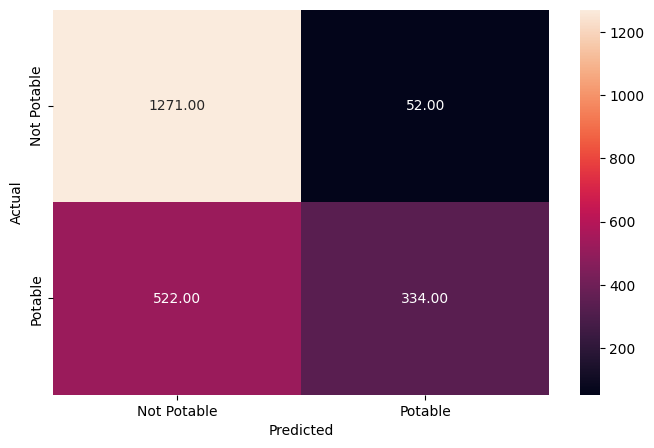

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       568
           1       0.71      0.29      0.41       367

    accuracy                           0.68       935
   macro avg       0.69      0.61      0.59       935
weighted avg       0.69      0.68      0.63       935



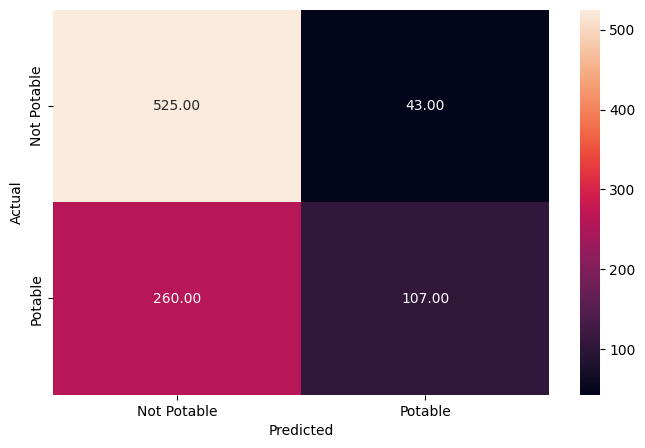

In [ ]:
# Instantiate the SVM model
svm_model = SVC(random_state=1)

#Fitting the SVM model
svm_model.fit(x_train,Y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
Y_pred_train_svm = svm_model.predict(x_train)
metrics_score(Y_train, Y_pred_train_svm)

#checking model performace of test data
print("Performance on Test Data:")
Y_pred_test_svm = svm_model.predict(x_test)
metrics_score(Y_test, Y_pred_test_svm)

**Observations**


*   Despite the low recall for class 1 the SVM model demonstartes a better balance between precision and recall for class 0 which heavily influences the overall metrics due to the larger support for class 0.
*   Precision for class 1 is the highest with the SVM model at 71%.
*   SVM model appers to be the most effective model overall.







# **Model 5: Random Forest Classifier**

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1323
           1       0.90      0.10      0.19       856

    accuracy                           0.64      2179
   macro avg       0.77      0.55      0.48      2179
weighted avg       0.74      0.64      0.54      2179



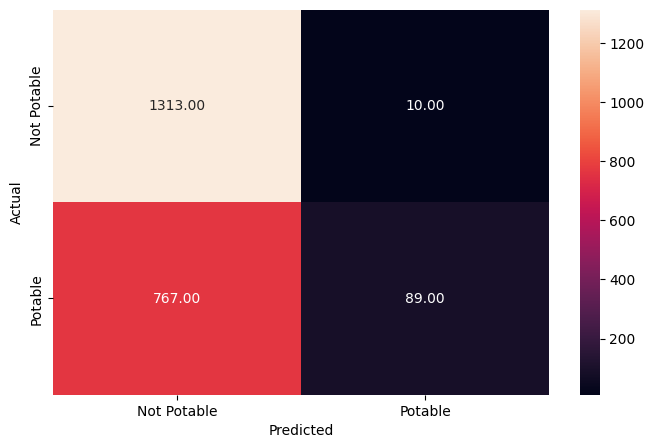

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       568
           1       0.94      0.08      0.15       367

    accuracy                           0.64       935
   macro avg       0.78      0.54      0.46       935
weighted avg       0.75      0.64      0.52       935



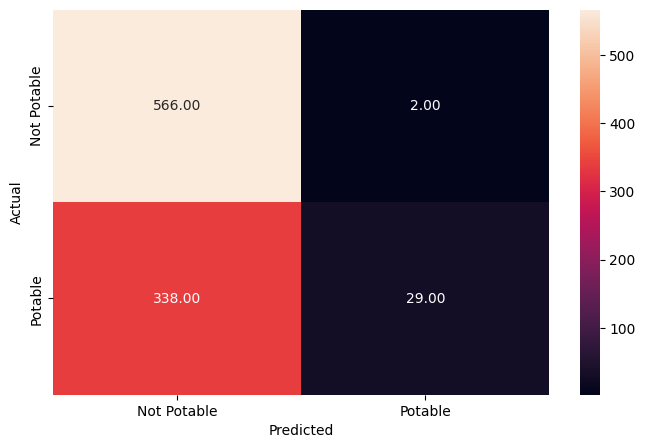

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,Y_train)
Y_pred = rf_clf.predict(x_test)

#checking model performace of training data
print("Performance on Training Data:")
Y_pred_train_dt = rf_clf.predict(x_train)
metrics_score(Y_train, Y_pred_train_dt)

#checking model performace of test data
print("Performance on Test Data:")
Y_pred_test_dt = rf_clf.predict(x_test)
metrics_score(Y_test, Y_pred_test_dt)

**Observations**

*   Random Forest Model is highly precise for class 1 but with very low recall,leading to a poor f1-score for this class
*   Overall accuracy is moderate at 64% but this figure doesnt reflect the performance disparity between classes



**Feature Importance**

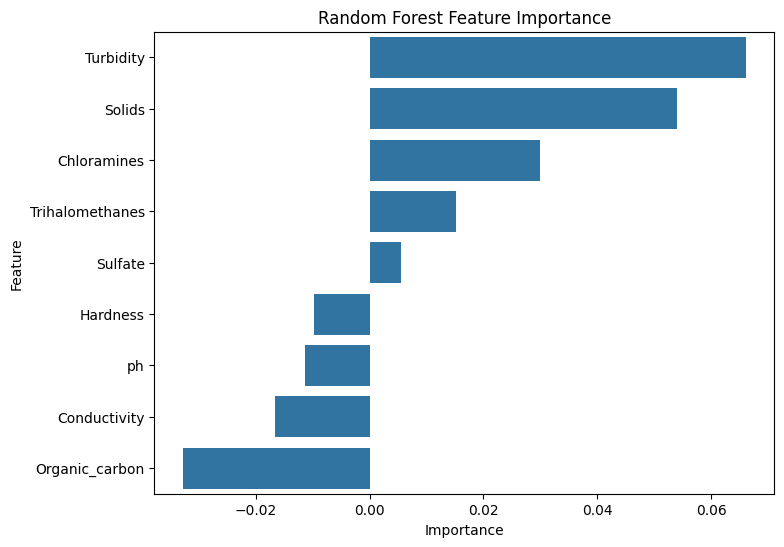

In [ ]:
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
plt.figure(figsize=(8,6))
sns.barplot(x=importance_df.Importance,y=importance_df.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

**Observations**

*   The less significant roles of ph and Hardness point to their reduced influence in the model's outcome.
*   The feature Turbidity stands out with the highest importance indicating it is the most significant predictor in the random forest model for this dataset.

